In [59]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
#importing data set
cars = pd.read_csv('Car_dataset.csv')
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [61]:
# copying the dataset
data = cars.copy(deep=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [62]:
#checking null values
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [63]:
# Nan value records
data[data.mileage.isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


Since milege, engine, max_power and seat columns have Nan values for same records. Hence remove NaN values

In [64]:
# removing Nan values
data.dropna(inplace=True)
data = data.reset_index(drop='first')

In [65]:
# unique values
for x in data.columns:
    if data[x].dtype == 'object':
        
        print('Variable Name: ',data[x].name,'\n',pd.unique(data[x]))
        print(data[x].value_counts(),'\n')

Variable Name:  name 
 ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1982, dtype: int64 

Variable Name:  fuel 
 ['Diesel' 'Petrol' 'LPG' 'CNG']
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64 

Variable Na

Since torque variable has multiple units , it is neglected

In [66]:
# dropping the unwanted variables
data.drop(['torque'],axis=1,inplace=True)

In [67]:
# inferencial statistics
data.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


##### From above statistics, it is clear that 
1. price variable is not uniformly distributed
2. Seats variable doesnot make any sense

In [68]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [69]:
# creating brand variable
x = []
for i in data.name:
    #x.append(' '.join(i.split(' ')[:2]))
    x.append(i.split(' ')[0])
data['brand'] = x

In [70]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti


In [71]:
# counts of brands
data.brand.value_counts()

Maruti           2367
Hyundai          1360
Mahindra          758
Tata              719
Honda             466
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        185
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: brand, dtype: int64

In [72]:
# preprocessing the milage variable
# correcting the milege variable
milage_kmpl = []
for i in range(0,len(data.mileage)):
    milage_kmpl.append(float(data.mileage[i].split(' ')[0]))

# updating the dataframe
data['milage_kmpl'] = milage_kmpl

In [73]:
# preprocessing the engine variable
engine_cc = []
for i in range(0,len(data.engine)):
    engine_cc.append(int(data.engine[i].split(' ')[0]))

# updating the dataframe
data['engine_cc'] = engine_cc

In [74]:
# preprocessing the max power variable
power_bhp = []
for i in range(0,len(data.max_power)):
    power_bhp.append(float(data.max_power[i].split(' ')[0]))
    
# updating the dataframe
data['power_bhp'] = power_bhp

In [75]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,milage_kmpl,engine_cc,power_bhp
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti,23.40,1248,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda,17.70,1497,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai,23.00,1396,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti,16.10,1298,88.20


In [76]:
# creating function to visualize the continuous variable
def visualize_conti():
    variables = ['km_driven','milage_kmpl','engine_cc','power_bhp']
    for var in variables:
        fig, axes = plt.subplots(1,3,figsize=(12,3))
        print('Variable:',var)
        axes[0].set_title('Distribution')
        sns.histplot(data[var],ax=axes[0])
        axes[1].set_title('Checking Outliers')
        sns.boxplot(data[var],ax=axes[1])
        axes[2].set_title('Relation with price')
        sns.scatterplot(data[var],data.selling_price,ax=axes[2])
        plt.show()
    
# creating function to visualize the categorical variable
def visualize_cato():
    variables = ['year','fuel','seller_type','transmission','owner','brand']
    for var in variables:
        fig, axes = plt.subplots(1,2,figsize=(12,3))
        print('Variable:',var)
        axes[0].set_title('Count')
        sns.countplot(data[var],ax=axes[0])

        axes[1].set_title('Relation with price')
        sns.boxplot(data[var],data.selling_price,ax=axes[1])
        for ax in fig.axes:
            ax.tick_params(axis='x', rotation=90)
        plt.show()

Variable: km_driven


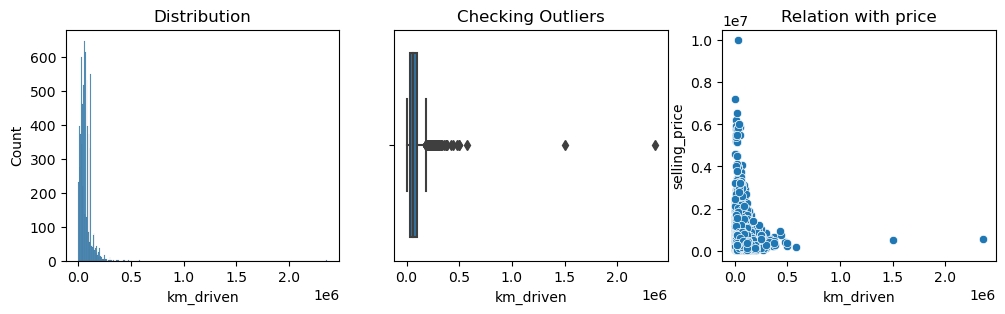

Variable: milage_kmpl


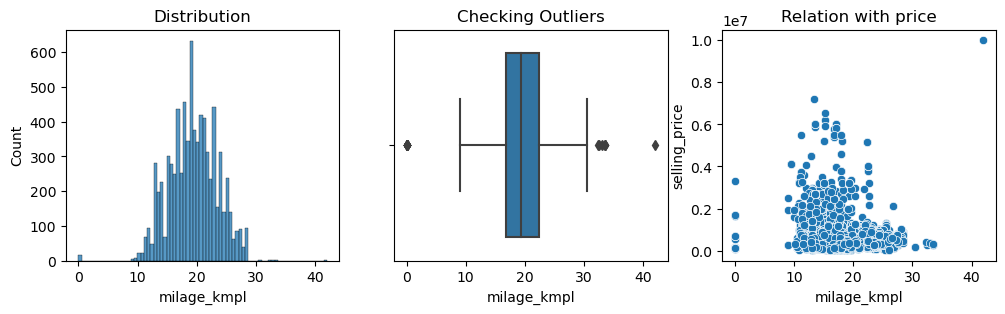

Variable: engine_cc


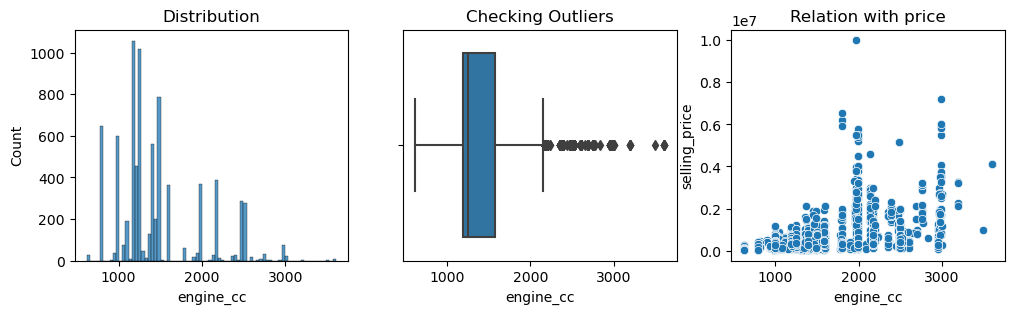

Variable: power_bhp


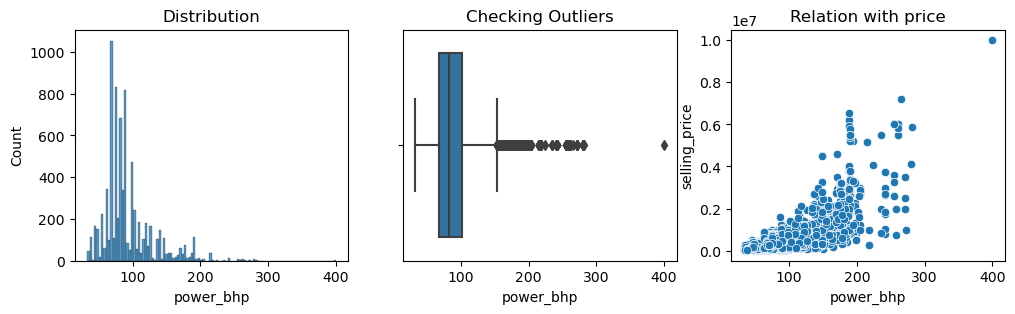

In [77]:
visualize_conti()

Variable: year


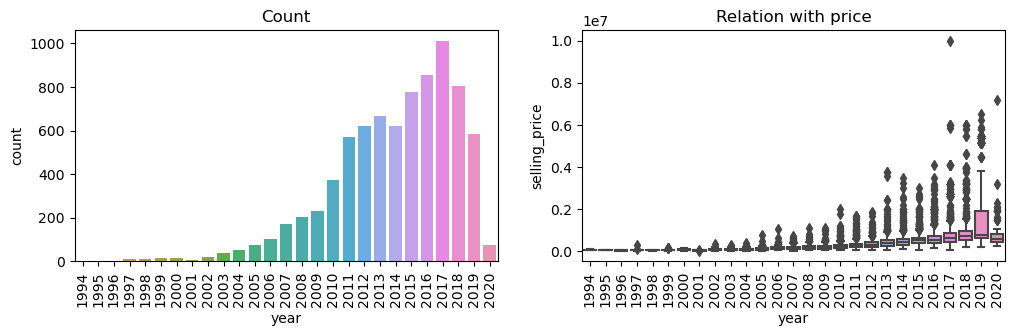

Variable: fuel


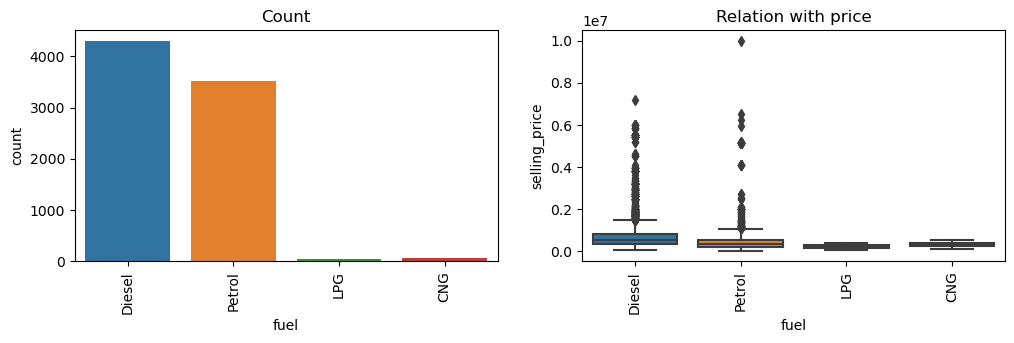

Variable: seller_type


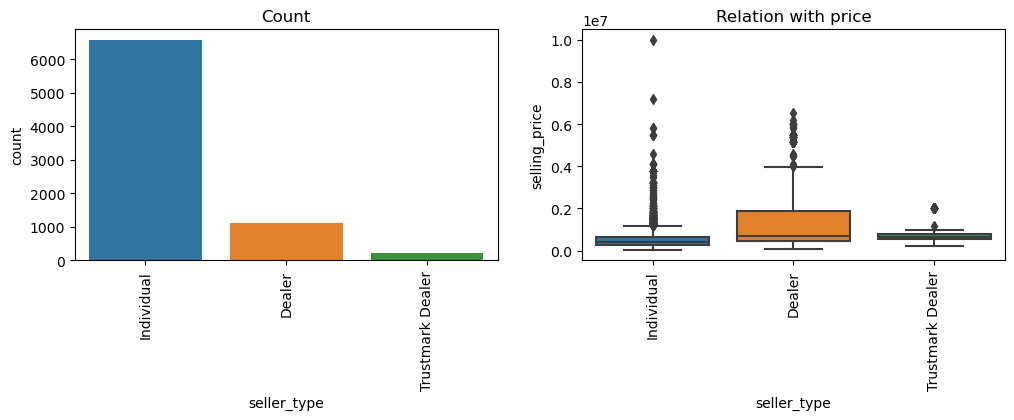

Variable: transmission


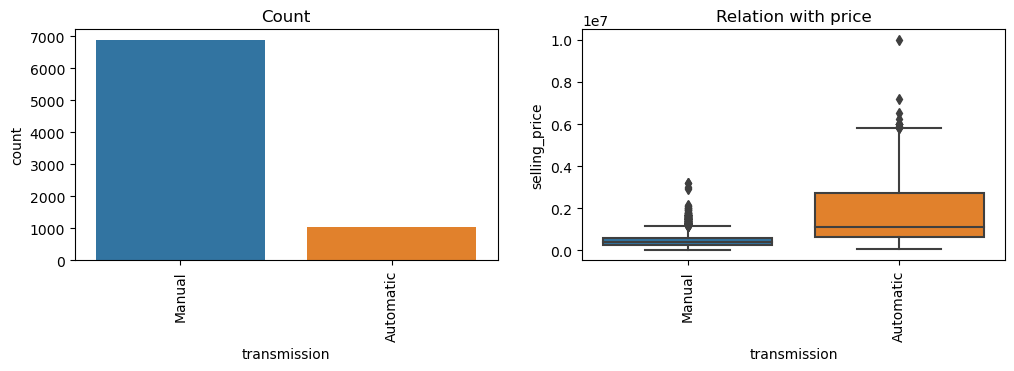

Variable: owner


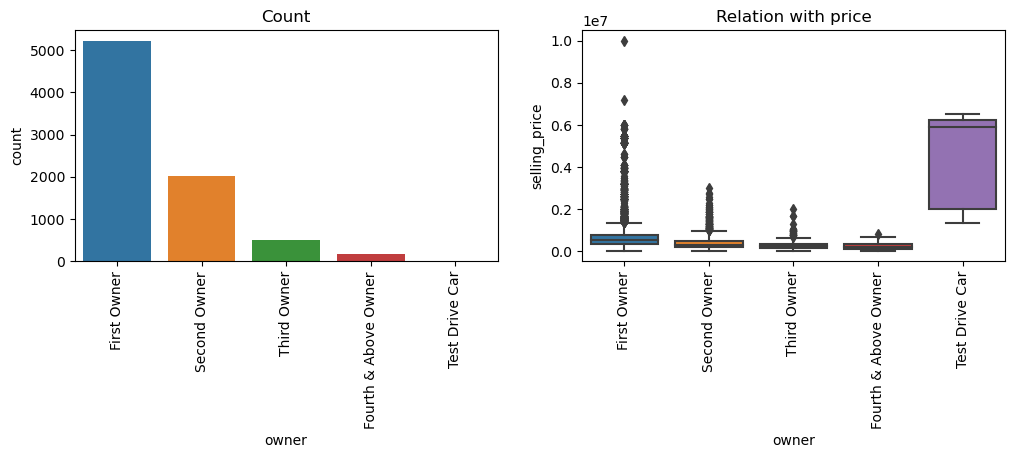

Variable: brand


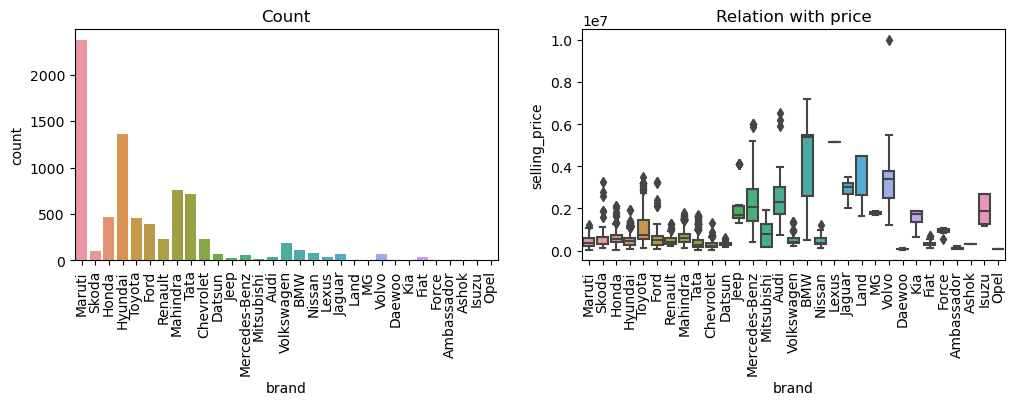

In [78]:
visualize_cato()

Variable: Price


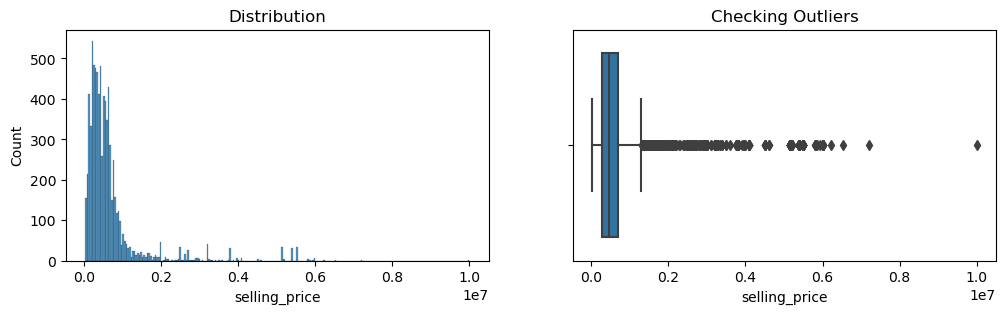

In [79]:
# visualizing output variable
print('Variable: Price')
fig, axes = plt.subplots(1,2,figsize=(12,3))
axes[0].set_title('Distribution')
sns.histplot(data.selling_price,ax=axes[0])
axes[1].set_title('Checking Outliers')
sns.boxplot(data.selling_price,ax=axes[1])
plt.show()

In [80]:
# dropping un-necessary columns
data.drop(['mileage','engine','max_power','name'],axis=1,inplace=True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   seats          7906 non-null   float64
 8   brand          7906 non-null   object 
 9   milage_kmpl    7906 non-null   float64
 10  engine_cc      7906 non-null   int64  
 11  power_bhp      7906 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 741.3+ KB


In [82]:
#creating new column 'AGE'
from datetime import datetime
data['age'] = datetime.now().year - data.year

In [83]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,milage_kmpl,engine_cc,power_bhp,age
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.40,1248,74.00,7
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,1498,103.52,7
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.70,1497,78.00,15
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.00,1396,90.00,11
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.10,1298,88.20,14


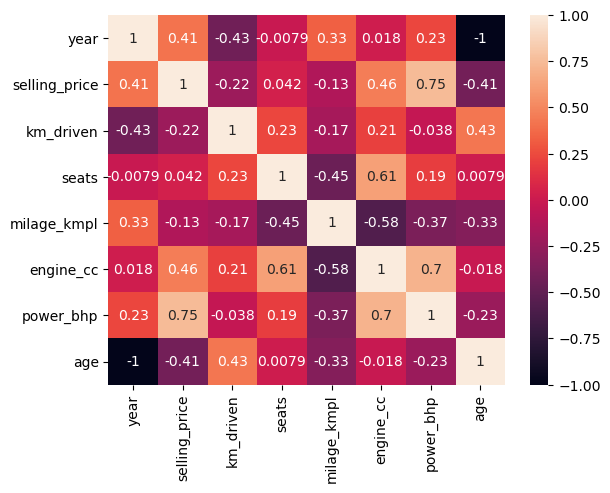

In [84]:
# checking corelation between the variables
sns.heatmap(data.corr(),annot=True)
plt.show()

power_bhp variable is 70% positively co-related with engine_cc.. Hence power_bhp variable is not considered for model building...

In [85]:
#encoding the label
from sklearn.preprocessing import LabelEncoder

In [86]:
# encoding fuel variable
encod_fuel = LabelEncoder()
data.fuel = encod_fuel.fit_transform(data.fuel)

pd.DataFrame(zip(encod_fuel.classes_,encod_fuel.transform(encod_fuel.classes_)),columns=['fuel','encoded'])

,fuel,encoded
0,CNG,0
1,Diesel,1
2,LPG,2
3,Petrol,3


In [87]:
# encoding seller_type variable
encod_seller = LabelEncoder()
data.seller_type = encod_seller.fit_transform(data.seller_type)

pd.DataFrame(zip(encod_seller.classes_,encod_seller.transform(encod_seller.classes_)),columns=['seller','encoded'])

,seller,encoded
0,Dealer,0
1,Individual,1
2,Trustmark Dealer,2


In [90]:
# encoding owner type varianle
encod_owner = LabelEncoder()
data.owner = encod_owner.fit_transform(data.owner)

pd.DataFrame(zip(encod_owner.classes_,encod_owner.transform(encod_owner.classes_)),columns=['owner','encoded'])

,owner,encoded
0,First Owner,0
1,Fourth & Above Owner,1
2,Second Owner,2
3,Test Drive Car,3
4,Third Owner,4


In [91]:
# Encoding brand variable
encod_brand = LabelEncoder()
data.brand = encod_brand.fit_transform(data.brand)

pd.DataFrame(zip(encod_brand.classes_,encod_brand.transform(encod_brand.classes_)),columns=['brand','encoded'])

,brand,encoded
0,Ambassador,0
1,Ashok,1
2,Audi,2
3,BMW,3
4,Chevrolet,4
5,Daewoo,5
6,Datsun,6
7,Fiat,7
8,Force,8
9,Ford,9


In [89]:
# encoding transmission variable
encod_transmission = LabelEncoder()
data.transmission = encod_transmission.fit_transform(data.transmission)

pd.DataFrame(zip(encod_transmission.classes_,encod_transmission.transform(encod_transmission.classes_)),columns=['transmission','encoded'])

,transmission,encoded
0,Automatic,0
1,Manual,1


In [92]:
# exporting all the encoders
import pickle
pickle.dump(encod_fuel,open('pickle_files/fuel.pkl','wb'))
pickle.dump(encod_seller,open('pickle_files/seller.pkl','wb'))
pickle.dump(encod_owner,open('pickle_files/owner.pkl','wb'))
pickle.dump(encod_brand,open('pickle_files/brand.pkl','wb'))
pickle.dump(encod_transmission,open('pickle_files/transmission.pkl','wb'))

In [93]:
# dataset after encoding
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,milage_kmpl,engine_cc,power_bhp,age
0,2014,450000,145500,1,1,1,0,5.0,20,23.40,1248,74.00,7
1,2014,370000,120000,1,1,1,2,5.0,26,21.14,1498,103.52,7
2,2006,158000,140000,3,1,1,4,5.0,10,17.70,1497,78.00,15
3,2010,225000,127000,1,1,1,0,5.0,11,23.00,1396,90.00,11
4,2007,130000,120000,3,1,1,0,5.0,20,16.10,1298,88.20,14


In [95]:
#splitting data into input and output
x = data.drop(['selling_price','year','power_bhp'],axis=1)
y = data.selling_price

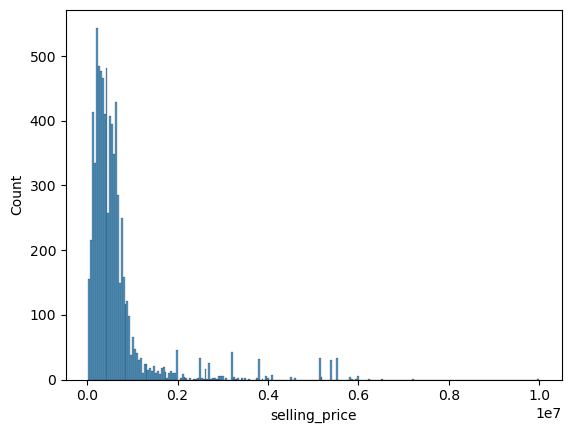

In [102]:
sns.histplot(y)
plt.show()

In [103]:
# output variable 'price' is log transformed 
y1 = np.log(y)

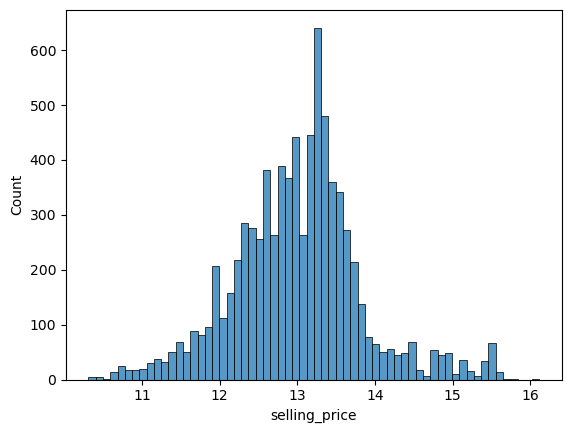

In [105]:
sns.histplot(y1)
plt.show()

In [106]:
#scaling the input data
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

x1 = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x1

,km_driven,fuel,seller_type,transmission,owner,seats,brand,milage_kmpl,engine_cc,age
0,0.061640,0.333333,0.5,1.0,0.00,0.25,0.666667,0.557143,0.209396,0.230769
1,0.050837,0.333333,0.5,1.0,0.50,0.25,0.866667,0.503333,0.293289,0.230769
2,0.059310,1.000000,0.5,1.0,1.00,0.25,0.333333,0.421429,0.292953,0.538462
3,0.053803,0.333333,0.5,1.0,0.00,0.25,0.366667,0.547619,0.259060,0.384615
4,0.050837,1.000000,0.5,1.0,0.00,0.25,0.666667,0.383333,0.226174,0.500000
...,...,...,...,...,...,...,...,...,...,...
7901,0.046601,1.000000,0.5,1.0,0.00,0.25,0.366667,0.440476,0.192282,0.269231
7902,0.050414,0.333333,0.5,1.0,0.25,0.25,0.366667,0.400000,0.291611,0.500000
7903,0.050837,0.333333,0.5,1.0,0.00,0.25,0.666667,0.459524,0.209396,0.423077
7904,0.010591,0.333333,0.5,1.0,0.00,0.25,0.900000,0.561190,0.259060,0.269231


In [107]:
# exporting the scalar function
import pickle
pickle_out = open('pickle_files/scalar.pkl','wb')
pickle.dump(scalar,pickle_out)
pickle_out.close()

In [108]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=1)

print('Shape of Spliting')
print(f'x_train={x_train.shape}, y_train={y_train.shape}, x_test={x_test.shape}, y_test={y_test.shape}')

Shape of Spliting
x_train=(6324, 10), y_train=(6324,), x_test=(1582, 10), y_test=(1582,)


## Building Model

In [109]:
# importing neccesary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# initializing the linear regression
lin = LinearRegression()

In [110]:
def get_results(model):
    # fitting on train and predicting for test data
    pred = model.fit(x_train,y_train).predict(x_test)
    
    #calculate RMSE
    RMSE = np.sqrt(mean_squared_error(y_test,pred))
    
    #calculate r2 score
    r2 = r2_score(y_test,pred)
    
    # printing the results
    print('RMSE = {}, r2_score = {}'.format(RMSE,r2))
    
    return RMSE, r2

In [111]:
# getting the results for linear regression algorithm
RMSE_lin, r2_lin = get_results(lin)

RMSE = 0.3462439240050482, r2_score = 0.8102230036261349


In [113]:
# Decision tree model
from sklearn.tree import DecisionTreeRegressor

decis = DecisionTreeRegressor()

RMSE_deci, r2_deci = get_results(decis)

RMSE = 0.2724739324871577, r2_score = 0.8824752959522397


In [123]:
import pickle
pickle.dump(decis,open('pickle_files/decision_tree.pkl','wb'))